In [162]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [163]:
# Load dataset
df = pd.read_csv("Dry_Eye_Balanced_6000_6000.csv")

In [164]:
# 2. Overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                11998 non-null  object 
 1   Age                   11998 non-null  float64
 2   Sleep duration        11989 non-null  float64
 3   Sleep quality         11990 non-null  float64
 4   Stress level          11989 non-null  float64
 5   Blood pressure        11986 non-null  object 
 6   Heart rate            11979 non-null  float64
 7   Daily steps           11969 non-null  float64
 8   Weight                11962 non-null  float64
 9   Sleep disorder        11962 non-null  object 
 10  Caffeine consumption  11960 non-null  object 
 11  Smoking               11966 non-null  object 
 12  Average screen time   11982 non-null  float64
 13  Blue-light filter     11984 non-null  object 
 14  Dry Eye Disease       12000 non-null  object 
dtypes: float64(8), obje

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Weight,Sleep disorder,Caffeine consumption,Smoking,Average screen time,Blue-light filter,Dry Eye Disease
0,F,25.0,6.6,3.0,2.0,99/60,99.0,17000.0,83.0,N,Y,N,7.2,Y,Y
1,F,39.0,8.1,1.0,4.0,100/87,83.0,10000.0,67.0,Y,Y,N,7.0,N,N
2,M,23.0,8.4,1.0,2.0,119/84,83.0,8000.0,75.0,N,N,Y,6.7,N,Y
3,M,44.0,4.2,1.0,5.0,113/78,82.0,6000.0,99.0,N,N,N,3.6,Y,N
4,M,24.0,8.7,5.0,3.0,128/64,100.0,11000.0,100.0,N,N,N,8.0,Y,Y


In [165]:
print(df["Dry Eye Disease"].value_counts())

Dry Eye Disease
Y    6000
N    6000
Name: count, dtype: int64


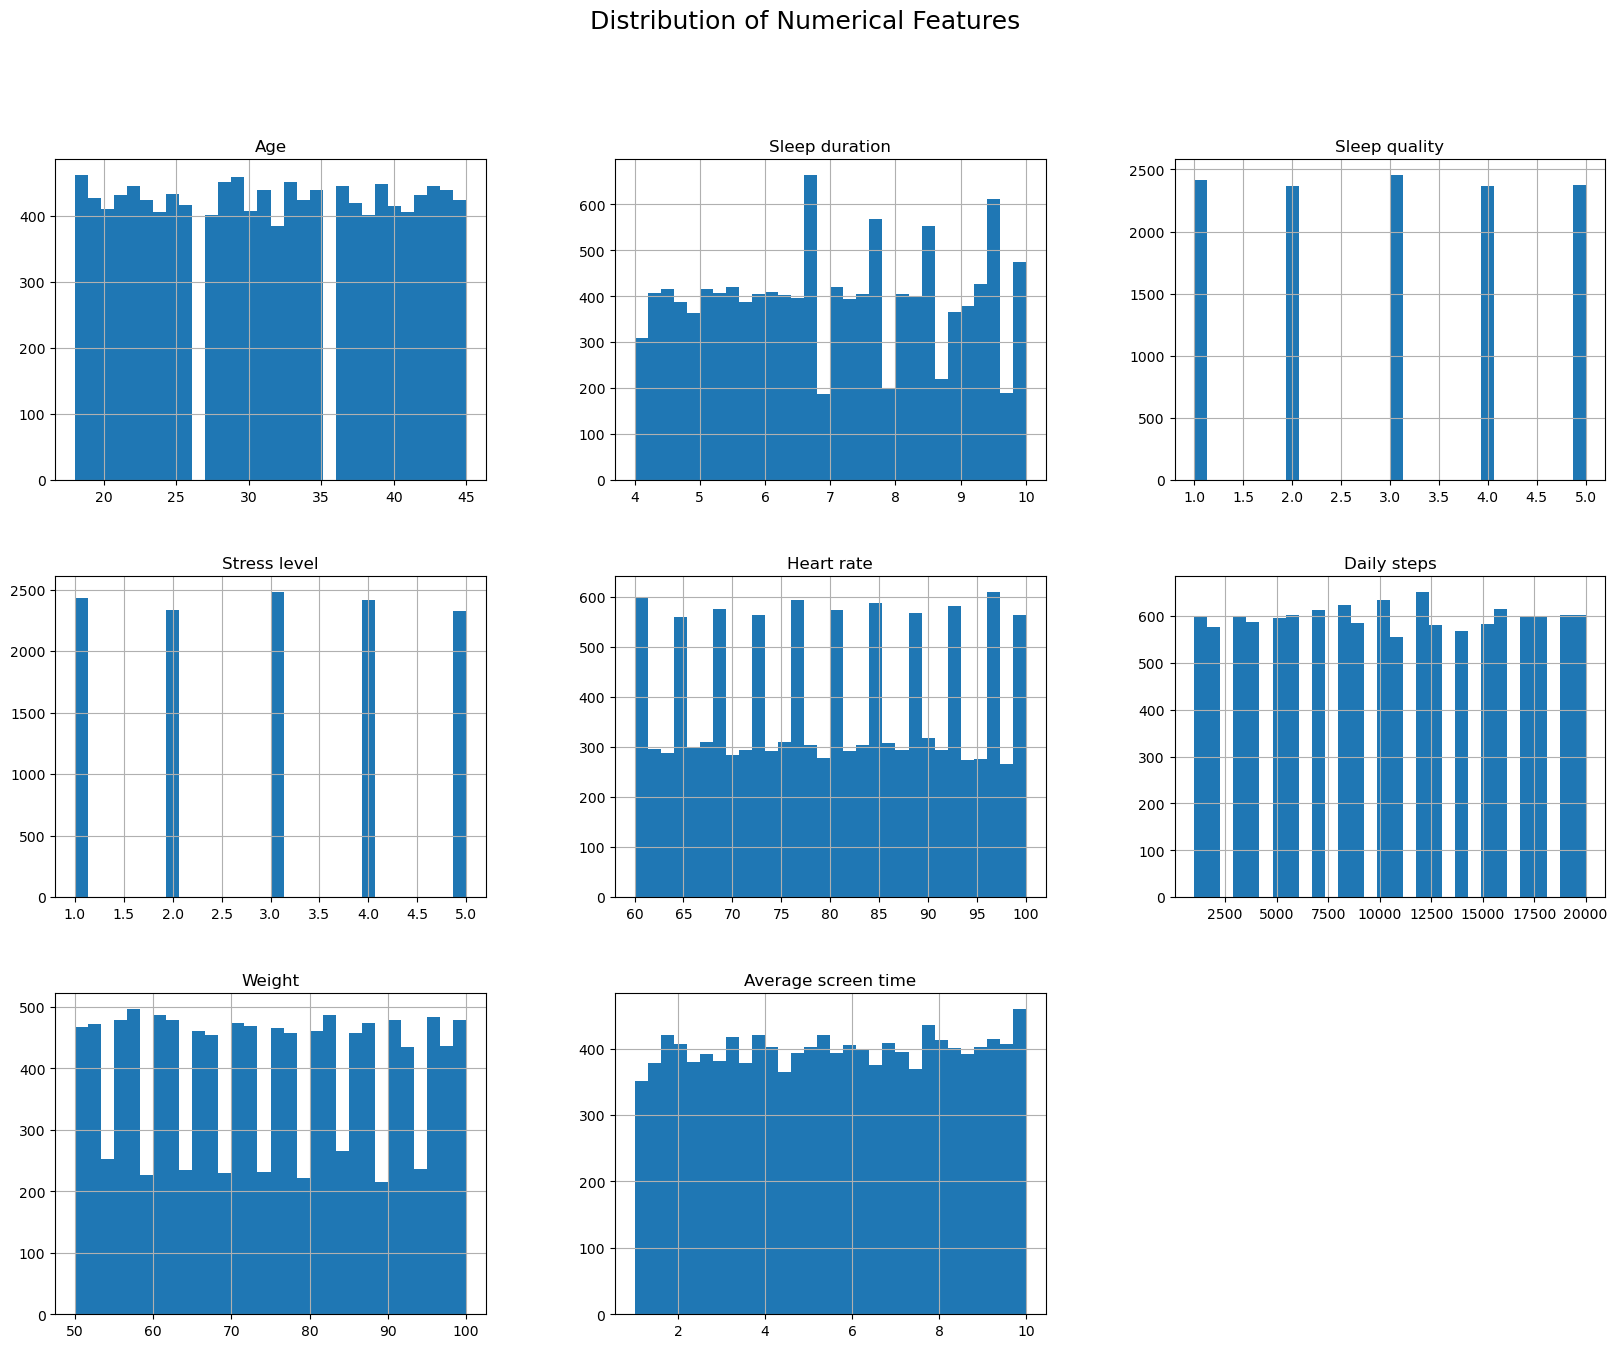

In [166]:
# Histograms for numerical features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.show()

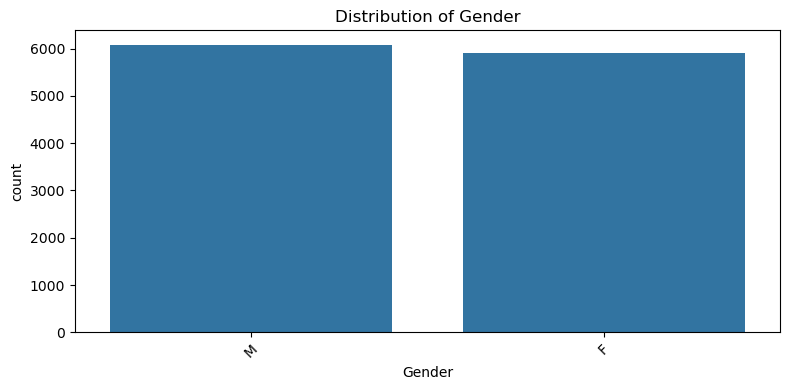

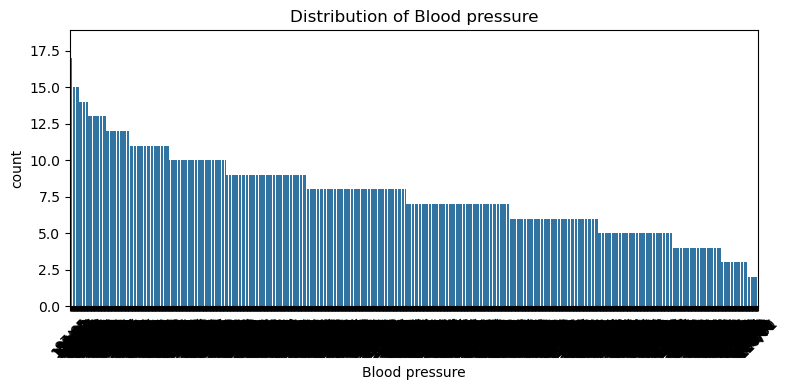

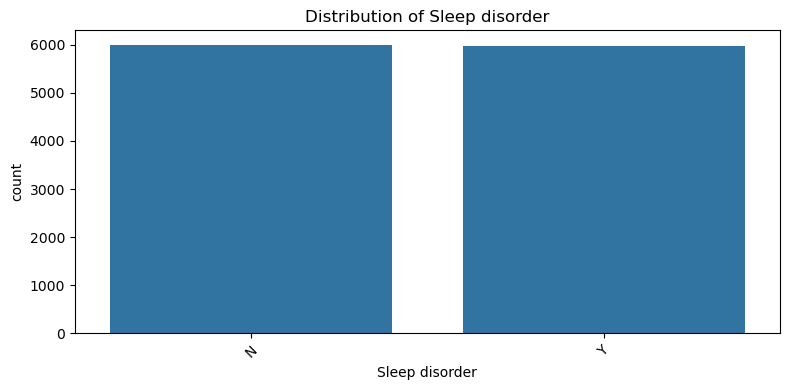

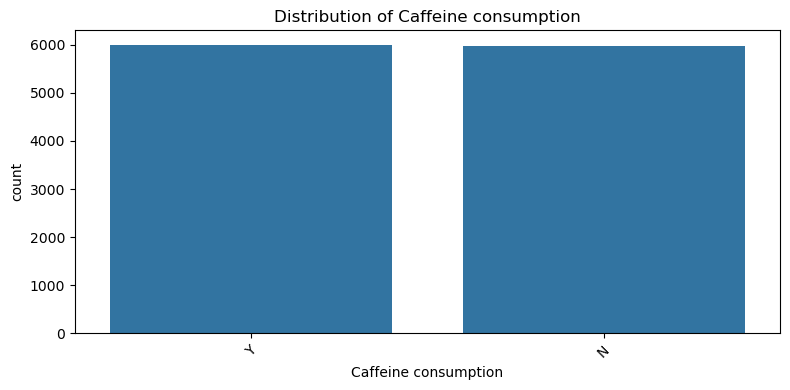

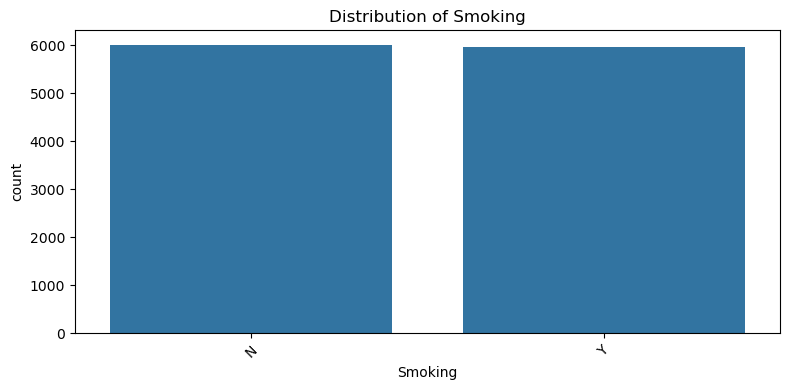

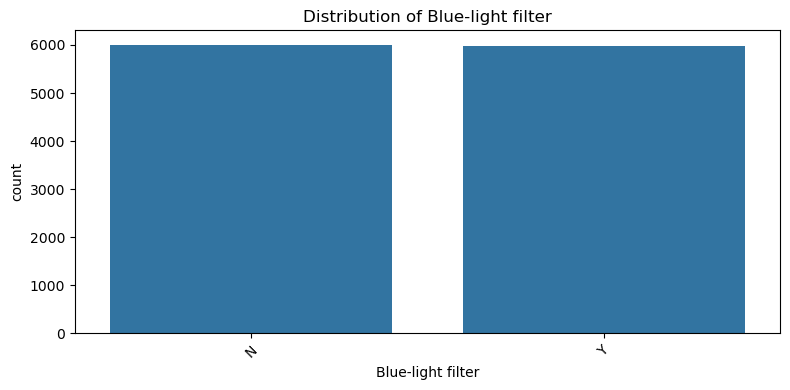

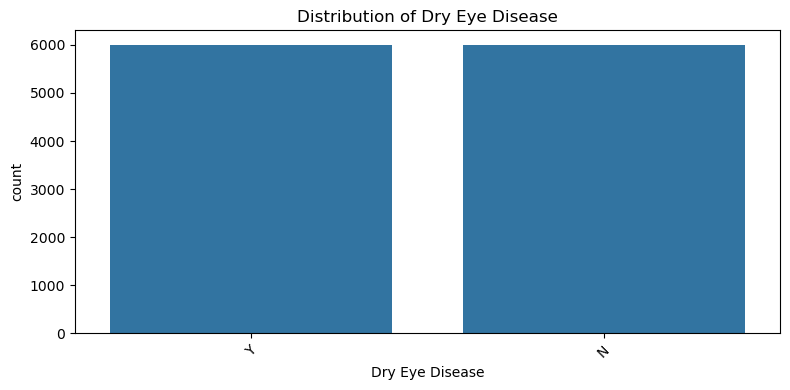

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Plot only the first 8 categorical columns
for col in categorical_cols[:8]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [168]:
df.isna()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Weight,Sleep disorder,Caffeine consumption,Smoking,Average screen time,Blue-light filter,Dry Eye Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [169]:
df.isna().sum()

Gender                   2
Age                      2
Sleep duration          11
Sleep quality           10
Stress level            11
Blood pressure          14
Heart rate              21
Daily steps             31
Weight                  38
Sleep disorder          38
Caffeine consumption    40
Smoking                 34
Average screen time     18
Blue-light filter       16
Dry Eye Disease          0
dtype: int64

In [170]:
# Step 3: Handle missing values
num_cols = df.select_dtypes(include=["float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns.drop("Dry Eye Disease")


In [171]:
# Step 2: Drop rows with missing target
df = df[df["Dry Eye Disease"].notnull()]

In [172]:
# Impute numeric columns with median
df[num_cols] = SimpleImputer(strategy="median").fit_transform(df[num_cols])

# Impute categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df["Dry Eye Disease"] = df["Dry Eye Disease"].fillna(df["Dry Eye Disease"].mode()[0])


In [173]:
df.isna().sum()

Gender                  0
Age                     0
Sleep duration          0
Sleep quality           0
Stress level            0
Blood pressure          0
Heart rate              0
Daily steps             0
Weight                  0
Sleep disorder          0
Caffeine consumption    0
Smoking                 0
Average screen time     0
Blue-light filter       0
Dry Eye Disease         0
dtype: int64

In [174]:
# Step 4: Custom encoding
df["Gender"] = df["Gender"].map({"M": 1, "F": 2})
binary_map = {"Y": 1, "N": 0}
for col in ["Sleep disorder", "Caffeine consumption", "Smoking", "Blue-light filter", "Dry Eye Disease"]:
    df[col] = df[col].map(binary_map)


In [175]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Weight,Sleep disorder,Caffeine consumption,Smoking,Average screen time,Blue-light filter,Dry Eye Disease
0,2,25.0,6.6,3.0,2.0,99/60,99.0,17000.0,83.0,0,1,0,7.2,1,1
1,2,39.0,8.1,1.0,4.0,100/87,83.0,10000.0,67.0,1,1,0,7.0,0,0
2,1,23.0,8.4,1.0,2.0,119/84,83.0,8000.0,75.0,0,0,1,6.7,0,1
3,1,44.0,4.2,1.0,5.0,113/78,82.0,6000.0,99.0,0,0,0,3.6,1,0
4,1,24.0,8.7,5.0,3.0,128/64,100.0,11000.0,100.0,0,0,0,8.0,1,1


In [176]:
# Step 5: Define features and target
X = df.drop(["Dry Eye Disease", "Blood pressure"], axis=1)
y = df["Dry Eye Disease"]



In [177]:
# Double-check for NaNs in final features and target
print("Missing in X:", X.isnull().sum().sum())
print("Missing in y:", y.isnull().sum())

Missing in X: 0
Missing in y: 0


In [178]:
# after comparison
missing_after = df.isnull().sum()
missing_after[missing_after > 0]

Series([], dtype: int64)

In [179]:
# Step 6: Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:
df.isna().sum()

Gender                  0
Age                     0
Sleep duration          0
Sleep quality           0
Stress level            0
Blood pressure          0
Heart rate              0
Daily steps             0
Weight                  0
Sleep disorder          0
Caffeine consumption    0
Smoking                 0
Average screen time     0
Blue-light filter       0
Dry Eye Disease         0
dtype: int64

In [181]:
# Step 8: Train models without scaling
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [182]:
# Step 9: Predictions (without scaling)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [183]:
# Step 10: Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate using unscaled prediction results
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)



Logistic Regression Evaluation
Accuracy: 0.505
Precision: 0.5007645259938838
Recall: 0.5504201680672269
F1 Score: 0.5244195356285029
Confusion Matrix:
 [[557 653]
 [535 655]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48      1210
           1       0.50      0.55      0.52      1190

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.50      2400
weighted avg       0.51      0.51      0.50      2400


Random Forest Evaluation
Accuracy: 0.4895833333333333
Precision: 0.48518204911092294
Recall: 0.4815126050420168
F1 Score: 0.48334036271615355
Confusion Matrix:
 [[602 608]
 [617 573]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50      1210
           1       0.49      0.48      0.48      1190

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.49   

In [184]:
# --- RANDOM FOREST FEATURE IMPORTANCE ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
selected_features_rf = importances.sort_values(ascending=False).head(5)

print("Top 5 important features for Random Forest:\n")
print(selected_features_rf)

Top 5 important features for Random Forest:

Average screen time    0.146491
Sleep duration         0.135836
Weight                 0.130094
Heart rate             0.127767
Age                    0.118212
dtype: float64


In [188]:
# --- LOGISTIC REGRESSION WITH RFE ---
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=lr_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features_logreg = X_train.columns[rfe.support_]

print("\nTop 5 selected features for Logistic Regression using RFE:\n")
print(selected_features_logreg.tolist())


Top 5 selected features for Logistic Regression using RFE:

['Gender', 'Sleep disorder', 'Caffeine consumption', 'Average screen time', 'Blue-light filter']


In [189]:
# === Train Logistic Regression on full training set (all features, not just RFE) ===
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# === Save the trained Logistic Regression model ===
joblib.dump(lr_model, 'logistic_model.pkl')
print("Logistic Regression model saved as 'logistic_model.pkl'")

Logistic Regression model saved as 'logistic_model.pkl'


In [190]:
y.value_counts()

Dry Eye Disease
1    6000
0    6000
Name: count, dtype: int64